# Delight SED

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : February 28th 2021
- Update : October 23th 2021
- **CCIN2P3 : kernel anaconda3pbspzrail**


- Use filters originally in Delight (Not DC2 filters)

- Last verification : January 5th 2022

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

## SED

In [3]:
basedelight_datapath_sed = "../../../data/SED" 

## # CWW SED

In [4]:
#ls ../data/BROWN_SEDs

In [5]:
files_sed_cww=["El_B2004a.dat","SB2_B2004a.dat","Sbc_B2004a.dat","ssp_25Myr_z008.dat","Im_B2004a.dat","SB3_B2004a.dat","Scd_B2004a.dat","ssp_5Myr_z008.dat"]

In [6]:
data_sed_cww= []
topdir = os.path.join(basedelight_datapath_sed,"CWW_SEDs")

for file in files_sed_cww:
    fullfilename=os.path.join(topdir,file)
    data=np.loadtxt(fullfilename)
    data_sed_cww.append(data)

(0.01, 100.0)

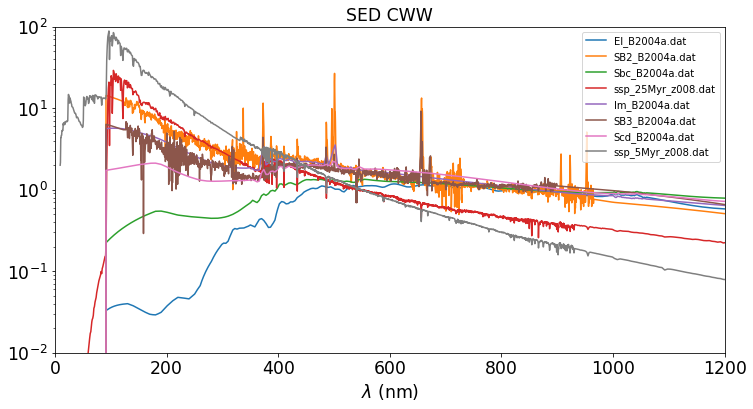

In [7]:
for idx in np.arange(len(data_sed_cww)):
    data=data_sed_cww[idx]
    x=data[:,0]/10
    y=data[:,1]
    plt.plot(x,y,"-",label=files_sed_cww[idx])
    
plt.legend()
plt.title("SED CWW")
plt.xlabel("$\lambda$ (nm)")
plt.xlim(0,1200)
plt.yscale("log")
plt.ylim(1e-2,1e2)

### Brown SED

In [8]:
from os import listdir
from os.path import isfile, join

In [9]:
topdir = os.path.join(basedelight_datapath_sed,"BROWN_SEDs")

In [10]:
list_of_files=listdir(topdir)

In [11]:
list_of_files[:5]

['NGC_4631_spec.dat',
 'NGC_1068_spec.dat',
 'UGC_08696_spec.dat',
 'IC_4553_spec.dat',
 'UGCA_410_spec.dat']

In [12]:
files_sed_brown = [f for f in listdir(topdir) if isfile(join(topdir, f))]

In [13]:
files_sed_brown =sorted(files_sed_brown)

In [14]:
files_sed_brown.remove('names.txt')

In [16]:
data_sed_brown= []
topdir = os.path.join(basedelight_datapath_sed,"BROWN_SEDs")

for file in files_sed_brown:
    fullfilename=os.path.join(topdir,file)
    data=np.loadtxt(fullfilename,comments='#')
    data_sed_brown.append(data)

(2e-16, 2e-12)

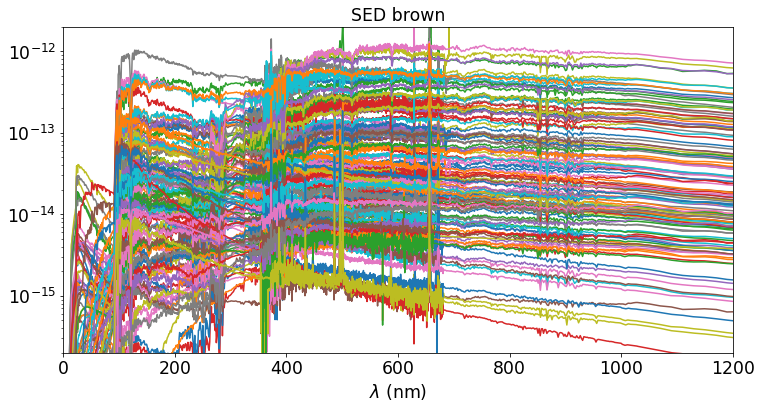

In [17]:
for idx in np.arange(len(data_sed_brown)):
    data=data_sed_brown[idx]
    x=data[:,0]/10
    y=data[:,1]
    plt.plot(x,y,"-",label=files_sed_brown[idx])
    
#plt.legend()
plt.title("SED brown")
plt.xlabel("$\lambda$ (nm)")
plt.xlim(0,1200)
plt.yscale("log")
plt.ylim(2e-16,2e-12)